<a href="https://colab.research.google.com/github/TwoBlackPaws/twoblackpaws.github.io/blob/main/14_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai
!pip install duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.4 MB/s eta 0:00:00


In [34]:
from fastai.vision.all import *
from duckduckgo_search import DDGS
import time
from fastdownload import download_url
from fastai.vision.widgets import *

In [3]:
def search_images(keywords, max_images=200):
  return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [4]:
searches = "panda", "grizzly", "koala"
path = Path("bears")

In [5]:
for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f"{o} bear photo"))
  time.sleep(5)
  resize_images(path/o, max_size=400, dest=path/o)



In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#23) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

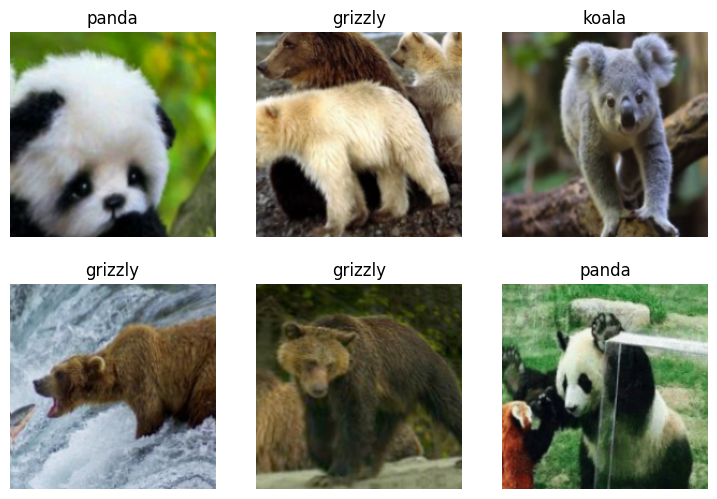

In [21]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [RandomResizedCrop(192, min_scale=0.3)],
    batch_tfms = aug_transforms()
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet50, metrics=[accuracy,error_rate])
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.769294,0.044499,0.981308,0.018692,00:03


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.198373,0.037891,0.981308,0.018692,00:04
1,0.124331,0.051942,0.981308,0.018692,00:04
2,0.088985,0.065377,0.981308,0.018692,00:04
3,0.073703,0.084498,0.981308,0.018692,00:04
4,0.065140,0.097182,0.971963,0.028037,00:04
5,0.056788,0.099438,0.981308,0.018692,00:04
6,0.058412,0.102521,0.981308,0.018692,00:04
7,0.048486,0.100615,0.981308,0.018692,00:04
8,0.038383,0.103757,0.981308,0.018692,00:04
9,0.032767,0.093343,0.981308,0.018692,00:04


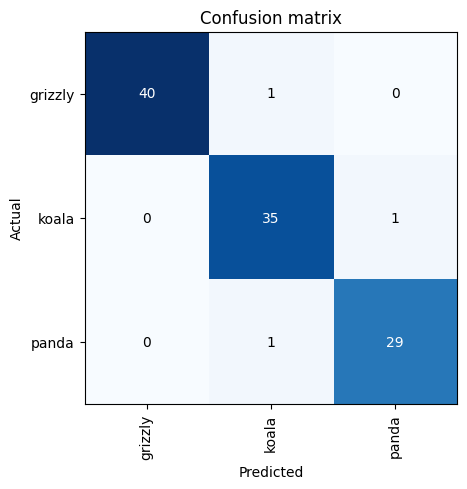

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


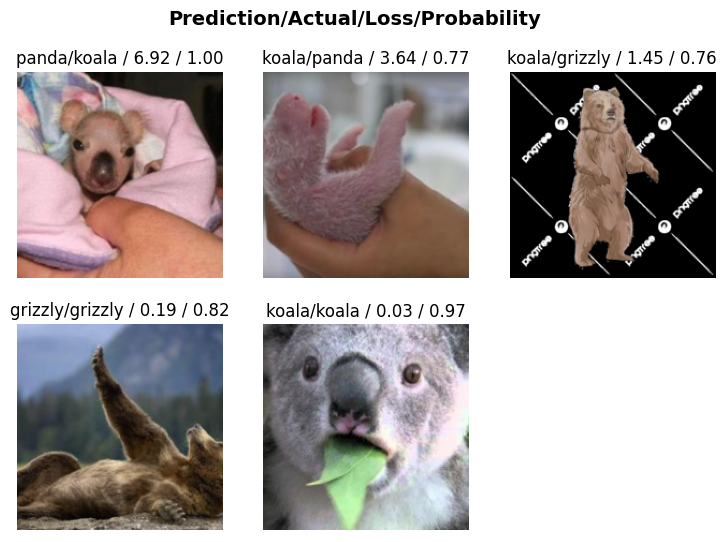

In [30]:
interp.plot_top_losses(5)

In [36]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [39]:
print(cleaner.delete())

[0, 1]


In [40]:
!git --version

git version 2.34.1


In [42]:
!git config --global user.email petrov.andrei@protonmail.com

In [44]:
!git config --global core.autocrlf true

In [46]:
!git config --help

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, including manpages, you can run the 'unminimize'
command. You will still need to ensure the 'man-db' package is installed.


In [49]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [50]:
!git add 14.03..ipynb

fatal: pathspec '14.03..ipynb' did not match any files
